In [1]:
# Real Estate Price Prediction Model

## Objective
##The objective of this project is to develop a machine learning model that accurately predicts the price per unit area of residential properties based on various features such as house age, distance to the nearest MRT station, and number of convenience stores. This will assist real estate investors and potential home buyers in making informed decisions.

## Scope
##This model focuses on predicting residential property prices within the dataset provided and does not account for external factors like economic changes or market trends that might affect real estate prices.


In [2]:
## Data Description

#The data used in this project is sourced from the 'Real Estate Price Prediction Dataset' on Kaggle, containing detailed information on residential property sales.

### Key Features:
#- `X1 transaction date`: Represents the date of the transaction.
#- `X2 house age`: Age of the house in years at the time of sale.
#- `X3 distance to the nearest MRT station`: Proximity to the nearest metro station in meters.
#- `X4 number of convenience stores`: Number of convenience stores within walking distance.
#- `Y house price of unit area`: Price per unit area of the property.

### Preprocessing Steps:
#- Removed entries with incomplete data.
#- Normalized the scale of 'distance to MRT station' to prevent scale disparities affecting model performance.


In [3]:
## Data Description

#The data used in this project is sourced from the 'Real Estate Price Prediction Dataset' on Kaggle, containing detailed information on residential property sales.

### Key Features:
#- `X1 transaction date`: Represents the date of the transaction.
#- `X2 house age`: Age of the house in years at the time of sale.
#- `X3 distance to the nearest MRT station`: Proximity to the nearest metro station in meters.
#- `X4 number of convenience stores`: Number of convenience stores within walking distance.
#- `Y house price of unit area`: Price per unit area of the property.

### Preprocessing Steps:
#- Removed entries with incomplete data.
#- Normalized the scale of 'distance to MRT station' to prevent scale disparities affecting model performance.


In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
data = pd.read_csv("Real estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [7]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [8]:
data.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [9]:
import matplotlib.pyplot as plt

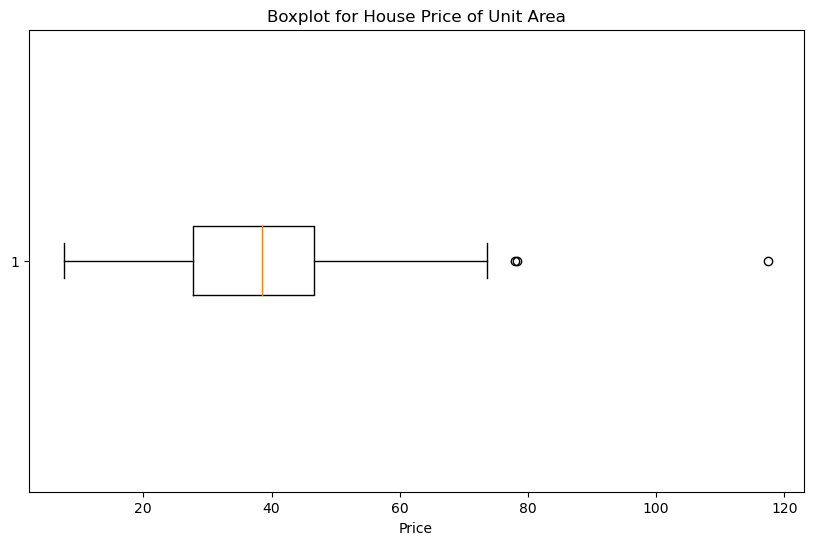

In [10]:


# Creating a boxplot for the house price of unit area
plt.figure(figsize=(10, 6))
plt.boxplot(data['Y house price of unit area'], vert=False)
plt.title('Boxplot for House Price of Unit Area')
plt.xlabel('Price')
plt.show()


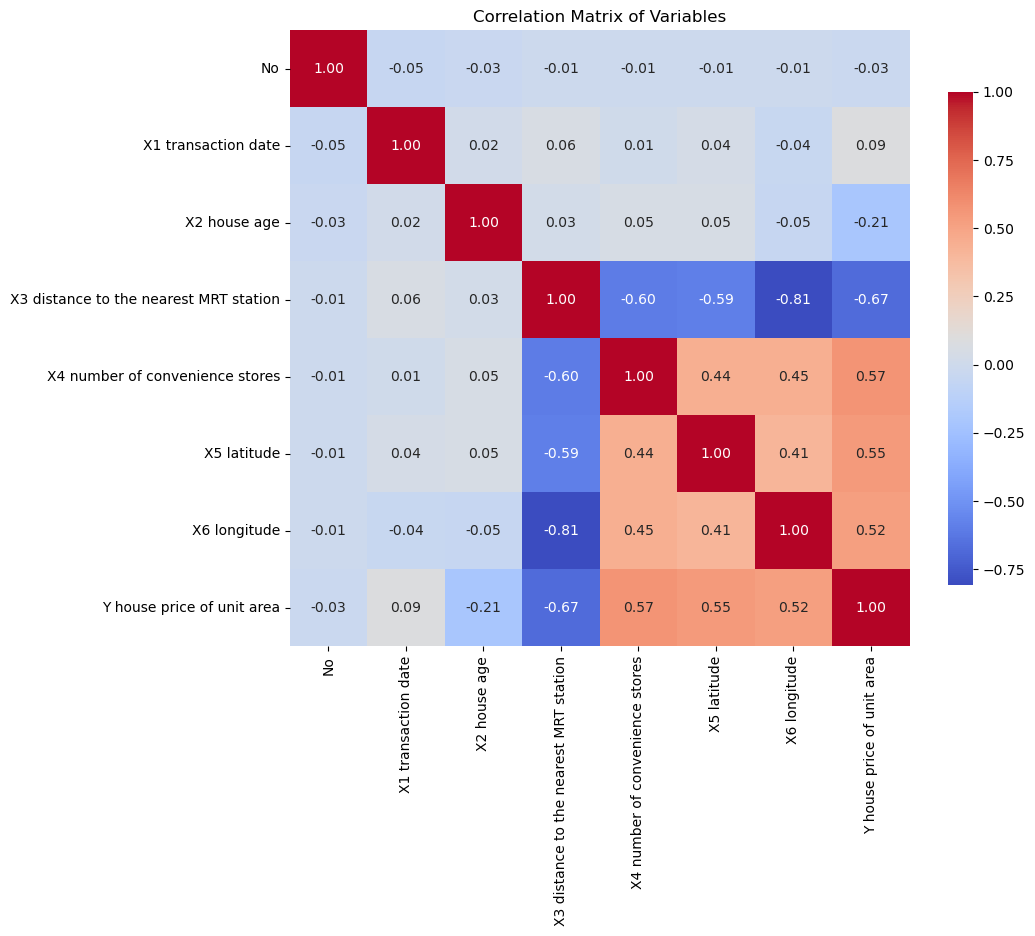

In [11]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Variables')
plt.show()


In [12]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate the PolynomialFeatures object
poly = PolynomialFeatures(degree=2, include_bias=False)

# Select the feature to transform
X_distance = data[['X3 distance to the nearest MRT station']]

# Fit and transform the feature
X_poly = poly.fit_transform(X_distance)

# Create a DataFrame to see the polynomial features
df_poly = pd.DataFrame(X_poly, columns=['X3', 'X3_squared'])

# Concatenate the new features to the original dataframe
data = pd.concat([data, df_poly['X3_squared']], axis=1)


In [13]:
from sklearn.model_selection import train_test_split

# Features (independent variables)
X = data.drop('Y house price of unit area', axis=1)  # Exclude the target variable

# Target (dependent variable)
y = data['Y house price of unit area']

# Split the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Fit the model to the scaled training data
model.fit(X_train_scaled, y_train)

# Predict the house prices on the scaled test data
y_pred = model.predict(X_test_scaled)

# Calculate the mean squared error and R-squared for the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 55.13687918509029
R-squared: 0.6713342682848751


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate MSE and R-squared
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")



Random Forest Mean Squared Error: 33.16401195180722
Random Forest R-squared: 0.8023124555497633


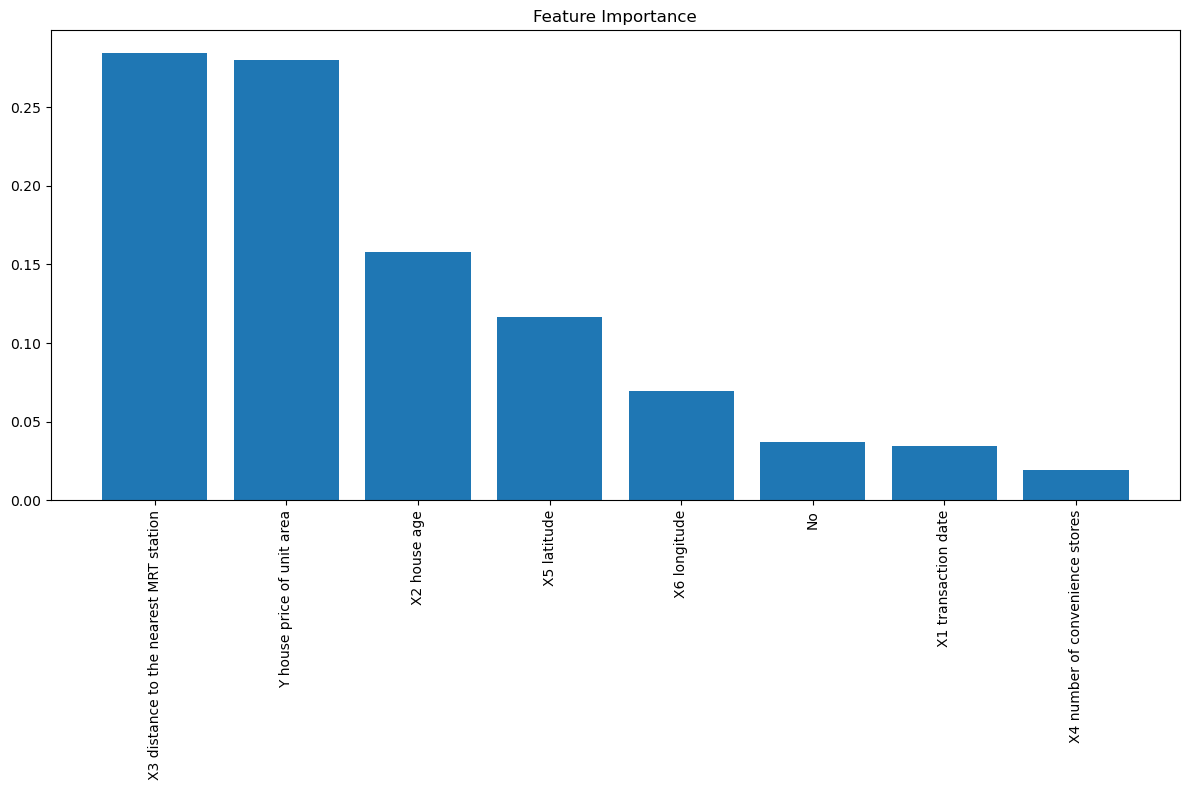

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importance
importances = rf_model.feature_importances_
# Sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

# Create labels for the feature importance chart
labels = data.columns[sorted_indices]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), labels, rotation=90)
plt.tight_layout()
plt.show()



In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],   # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40, 50],    # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]               # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Setup the RandomizedSearchCV instance
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters found: ", rf_random.best_params_)
print("Best score achieved: ", rf_random.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40}
Best score achieved:  0.6784758891163324


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest model with the best parameters
optimized_rf = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=40,
    random_state=42
)

# Fit the model on the training data
optimized_rf.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_optimized = optimized_rf.predict(X_test_scaled)

# Calculate MSE and R-squared
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Random Forest Mean Squared Error: {mse_optimized}")
print(f"Optimized Random Forest R-squared: {r2_optimized}")


Optimized Random Forest Mean Squared Error: 29.405388303438922
Optimized Random Forest R-squared: 0.8247172562909483


In [20]:
## Conclusion

#This project successfully applied the Random Forest regression model to predict real estate prices, achieving an R-squared of 0.825 and an MSE of 29.405. These results demonstrate the model's strong predictive power and its utility in helping stakeholders make informed decisions. Future work could explore the integration of additional data sources, apply more complex models, and implement real-time data processing to enhance predictive accuracy and relevancy.
